In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import auc, roc_curve

import statsmodels.formula.api as smf

</div>
<div class="4. Header" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white;">
       <h2>1. Logistic regression</h2>
        <h4>Here we perform the logistic regression predicting the labels (<code class='python'>finished</code> or <code class='python'>unfinished</code> based on the features extracted in the "Between game" and "In Game" analysis.</h4>
    </span>
</div>
</div>

</div>
<div class="1.2 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h3>2.1 Combine features.</h3>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        First combine all features we have seen so far.
    </span>
</div>

In [3]:
#Load features
in_game = pd.read_csv("data/in_game_features.csv", encoding = 'utf-8', index_col = 'hashedIpAddress')
between_game = pd.read_csv("data/between_game_features.csv", encoding = 'utf-8', index_col = 'hashedIpAddress')

#Load labels
labels = pd.read_csv("data/labels.csv", encoding = 'utf-8', index_col = 'hashedIpAddress')

In [4]:
#merge all DataFrame's
data = in_game.join([between_game, labels])

#extract feature matrix
features = ['starting', 'target', 'history_unfinished_games', 'chained_unfinished', 'first_last_time', 'max_finished_streak']
X = data[features].to_numpy()
y = data[['last_game']].to_numpy().flatten()

In [5]:
#display snippet of data
data.head(4)

,starting,target,history_unfinished_games,chained_unfinished,first_last_time,max_finished_streak,last_game
hashedIpAddress,,,,,,,
000386124f307de8,-3.471042,0.733099,-0.232938,-0.336306,-0.110171,-0.019725,0
0007183207b6008f,-0.227442,1.769132,-0.232938,-0.336306,-0.110488,0.008317,1
000a09e202e88d10,0.804576,1.116216,-0.232938,-0.336306,-0.110523,-0.047768,1
000a5bac5b7781ea,-0.978341,-0.375861,-0.232938,-0.336306,-0.110523,-0.047768,1


</div>
<div class="1.2 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h3>2.2 Set up logistic regression model</h3>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Now let's initialized the model.
    </span>
</div>

In [6]:
logistic = LogisticRegression(solver='lbfgs', random_state=10)

</div>
<div class="1.2 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h3>2.3 Assess performance</h3>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        We will assess the <b>precision</b>, <b>recall</b>, <b>accuracy</b> and <b>f-score</b>.
    </span>
</div>

In [9]:
precision = cross_val_score(logistic, X, y, cv=10, scoring="precision")
recall = cross_val_score(logistic, X, y, cv=10, scoring="recall")
accuracy = cross_val_score(logistic, X, y, cv=10, scoring="accuracy")
f1 = cross_val_score(logistic, X, y, cv=10, scoring="f1")

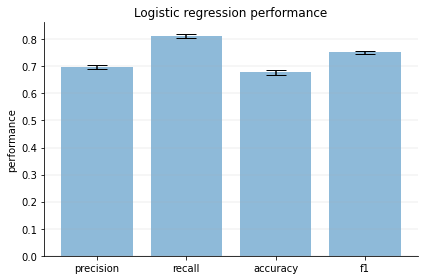

In [11]:
metrics = ['precision', 'recall', 'accuracy', 'f1']
x_pos = np.arange(len(metrics))
means = [precision.mean(), recall.mean(), accuracy.mean(), f1.mean()]
stds = [precision.std(), recall.std(), accuracy.std(), f1.std()]

# Create bar plot
fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('performance')
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics)
ax.set_title('Logistic regression performance')

#Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.grid(True, linewidth=0.2)
# Save the figure and show
plt.tight_layout()

In [14]:
print("We have \n precision : %.3f\n recall : %.3f\n accuracy : %.3f \n f1 : %.3f"%(means[0],means[1],means[2],means[3]))

We have 
 precision : 0.698
 recall : 0.813
 accuracy : 0.678 
 f1 : 0.751


In [10]:
# Predict the probabilities with a cross validationn
y_pred = cross_val_predict(logistic, X, y, cv=10, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y, y_pred[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)

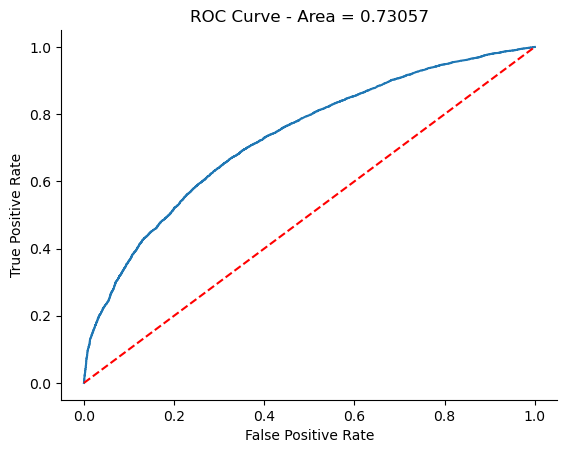

In [11]:
fig, ax = plt.subplots()

ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1],'r--')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve - Area = {:.5f}".format(auc_score));
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

</div>
<div class="1.2 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h3>2.4 Interpretation of the model</h3>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Here we interpret the model.
    </span>
</div>

In [12]:
mod = smf.logit(formula='last_game ~ starting + target + history_unfinished_games + chained_unfinished + first_last_time + max_finished_streak', data=data)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.595365
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              last_game   No. Observations:                18948
Model:                          Logit   Df Residuals:                    18941
Method:                           MLE   Df Model:                            6
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:                  0.1164
Time:                        22:09:52   Log-Likelihood:                -11281.
converged:                       True   LL-Null:                       -12767.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.5448      0.018     30.567      0.000       0.510

</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        A basic logistic regression with features from an in-game analysis as well as a between-game analysis were analyzed further to predict the dependent variable "last game". The logistic predicts if a player is more likeli to finish (binary = 1) or not finish (binary = 0) the last game. The value obtained by the logistic regression is between 0 and 1. If the value is closer to 1, the player is more likely to finish the game. The model was trained on 18'948 observations with 6 predictor variables. The p-value for every coefficient tests the null hypothesis that the coefficient is equal to 0. That would mean that the predictor has no effect on the dependent variable. If the p-value is less than 0.05 the null hypothesis can be rejected. In this logistic regression this is the case. That means that every predictor is significantly related to the dependent variable. There is no single most important feature in a logistic regression model. All features can contribute to the prediction of the dependent variable. However, the relative importance of each feature can be seen by the magnitude of the coefficient. Larger coefficients generally indicate that a predictor has a stronger effect on the dependend variable. 
        
        
        
The predictors "starting", "target", as well as "max_finished_streak" have a positive effect on the logistic regression and influence in the direction of finishing a path.
- "max_finished_streak" is showing the biggest coefficient in the logistic model and is therefore an important factor in predicting the dependend variable. Max_finished_streak contains information about the longest path of finished games in a player's history before the final game. This can lead to the conclusion, that the motivation of the player has an influence on the number of finished games.
- "target" contains information about the target article of the last game. 
- "starting" contains information about the starting article of the last game.

        
        
The predictors "history_unfinished_games", "chained_unfinished", as well as "first_last_time" have a negative effect on the logistic regression and influence in the direction of an unfinished path:
- "history_unfinished_games" is showing the biggest negative tendency. A player with a lot of unfinished games in the history is therefore more likely to not finish a game.
- "chained_unfinished" contains information about how long the chain of unfinished games was before the last game. The longer the chain, the more it will contribute that the player will not finish the game. 
- "first_last_time" has the smallest coefficient of the logistic regression. It indicates wether how many time has passed between the first and the last played game. It seems like there is not a big influence if a player played the first time a long time ago. This makes also sense, a player can therefore also have made some breaks in between. But still it seems like the longer away the first time was, the more likeli a player will not finish the game. 
    </span>
</div>